error_L2[ 1 ] = 0.0653374521329772


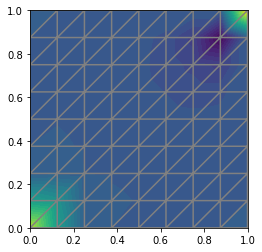

error_L2[ 2 ] = 0.015883461899475735


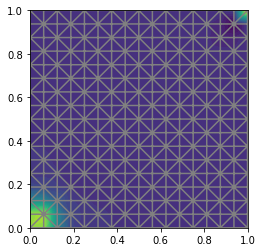

error_L2[ 3 ] = 0.00360979047205037


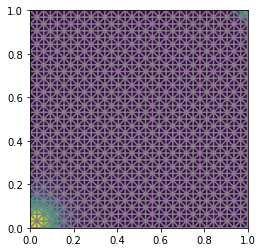

error_L2[ 4 ] = 0.0012808696743242037


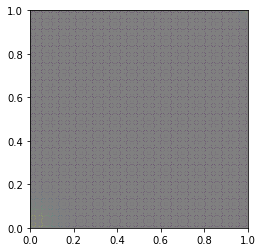

error_L2[ 5 ] = 0.00032760379545077403


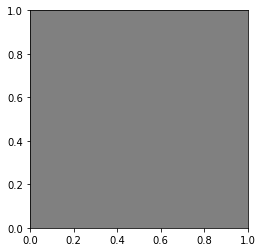

error_L2[ 6 ] = 8.357496584545353e-05


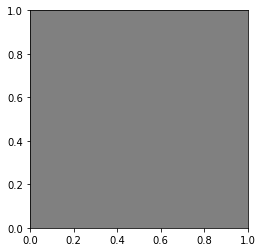

error_L2[ 7 ] = 2.0947700262115307e-05


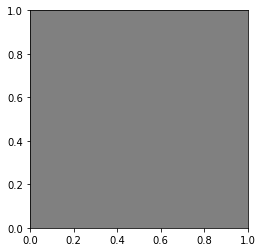

rate = 2.040384806123757
rate = 2.137538386769424
rate = 1.4947914071480577
rate = 1.967099715576934
rate = 1.9708093060360818
rate = 1.9962789935429943


In [4]:
# from dolfin import *
from math import log as ln
import pandas as pd
import numpy as np

# Create the initial mesh (with globally 256 triangles) of the unit square
mesh = UnitSquareMesh(8, 8)

max_level =8
error_L2 =list(range(max_level))
for i in range(1,max_level):

    # Define function space
    V = FunctionSpace(mesh, 'Lagrange', 1)
    # Define boundary conditions
    u0 = Expression('exp(-100.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03))) + exp(-1000.0*((x[0] - 1.0)*(x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))', degree=2)

    # Set the boundary conditions bc
    def u0_boundary(x, on_boundary):
        return on_boundary
    bc = DirichletBC(V, u0, u0_boundary)

    # Define variational problem
    u = TrialFunction(V)
    v = TestFunction(V)

    # Define the right-hand side
    f = Expression('(400.0 - 40000.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03)))*exp(-100.0*((x[0] - 0.03)*(x[0] - 0.03) + (x[1] - 0.03)*(x[1] - 0.03))) + (4000.0 - 4000000.0*((x[0] - 1.0)*(x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))*exp(-1000.0*((x[0] - 1.0)*    (x[0] - 1.0) + (x[1] - 1.0)*(x[1] - 1.0)))',degree=2)

    # Define the bilinear form a(u,v) contained in the weak formulation of the
    # problem and the linear form L(v) of the right-hand side
    a = inner(nabla_grad(u), nabla_grad(v))*dx
    L = f*v*dx

    # Compute solution
    u = Function(V)
    solve(a ==L, u, bc)

    # Dump solution to file in VTK format
    file = File('poisson.pvd')
    file <<u

    # Plot solution and mesh
    import matplotlib.pyplot as plt
    plot(u)
    plot(mesh)
    
    # Error computation at level i
    error_L2[i] = errornorm(u0, u, 'L2')
    print('error_L2[', i, '] =', error_L2[i])

    # Hold plot
    #interactive()
    plt.show()
    # Refine mesh for the next iteration
    mesh = refine(mesh)
# Compute convergence rates
for i in range(1,max_level-1):
    h1 = 1.0/(2.0**i)
    h2 = 1.0/(2.0**(i+1))
    rate = ln(error_L2[i+1]/error_L2[i])/ln(h2/h1)
    print('rate =', rate)